It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

--Do any of your classifiers seem to overfit?

--Which seem to perform the best? Why?

--What features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

## 1 - Negative Words



In [2]:
sms_raw = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

In [3]:
sms_raw.columns = ['Sentence', 'Sentiment']

In [4]:
sms_raw.Sentiment.value_counts()

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


1    500
0    500
Name: Sentiment, dtype: int64

In [5]:
negative = ['waste', 'breaks', 'lousy','cannot','disappoint','disappointed','junk','poor',
           "doesn't", 'bad', "don't", 'problem', 'misleading', 'difficult','unreliable','horrible','broken','fail', 'terrible']

for word in negative:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(word)] = sms_raw.Sentence.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )

In [6]:
sms_raw['Sentiment'] = (sms_raw['Sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

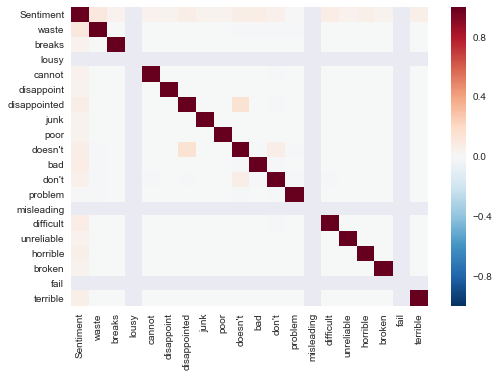

In [7]:
sns.heatmap(sms_raw.corr())

In [8]:
data = sms_raw[negative]  #features
target = sms_raw['Sentiment']  #ground_truth


In [9]:


# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn import model_selection

data_train, data_test, target_train, target_test = sklearn.model_selection.train_test_split(
   data, target, test_size=0.30, random_state=42)

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# # Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
test_pred = bnb.predict(data_test)  #making preductions using test features
train_pred = bnb.predict(data_train)
train_confusion = pd.crosstab(target_train, train_pred)
test_confusion = pd.crosstab(target_test, test_pred)

# Display our results.
print("Train: Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (target_train != train_pred).sum()
))


print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != test_pred).sum()
))

Train: Number of mislabeled points out of a total 700 points : 318
Test: Number of mislabeled points out of a total 300 points : 127


In [16]:

#Accuracy train 
accuracy=(train_confusion.iloc[0,0]+train_confusion.iloc[1,1])/len(target_train)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = train_confusion.iloc[0,0]/(train_confusion.iloc[0,1]+train_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = train_confusion.iloc[1,1]/(train_confusion.iloc[1,0]+train_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)


Accuracy :  0.545714285714
Specificity :  0.982658959538
Sensitivity :  0.118644067797


In [18]:
#Accuracy test
accuracy=(test_confusion.iloc[0,0]+test_confusion.iloc[1,1])/len(target_test)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = test_confusion.iloc[0,0]/(test_confusion.iloc[0,1]+test_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = test_confusion.iloc[1,1]/(test_confusion.iloc[1,0]+test_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)


Accuracy :  0.576666666667
Specificity :  0.993506493506
Sensitivity :  0.13698630137


In [19]:
print(train_confusion)
print('\n')

print(test_confusion)

col_0      False  True 
Sentiment              
False        340      6
True         312     42


col_0      False  True 
Sentiment              
False        153      1
True         126     20


Our train and test groups have similar accuracies, specificities and sensitivities, so there doesn't seem to be much overfitting. The sensitivies are low though, meaning the model is not great at correctly identifying positive reviews.

## 2 - Positive words


In [24]:
amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

amazon.columns = ['Sentence', 'Sentiment']


In [25]:
positive = ['good','great','excellent','nice','love','beautiful','best','enjoy',
                  'highly','brilliant','tremendous','loved','awesome','impressed','perfect','pleased']


In [26]:
#turn sentiment into boolean
amazon['Sentiment'] = (amazon['Sentiment'] == 1)

In [27]:
for word in positive:
    amazon[word] = amazon['Sentence'].apply(lambda x: word in x)

In [28]:
data = amazon[positive]
target = amazon['Sentiment']


# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn import model_selection


#these data_train, etc are different than what defined above. cocneptually play different role
data_train, data_test, target_train, target_test = sklearn.model_selection.train_test_split(
   data, target, test_size=0.30, random_state=42)  #train_test_split makes a random choice

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# # Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
test_pred = bnb.predict(data_test)
train_pred = bnb.predict(data_train)
train_confusion = pd.crosstab(target_train, train_pred)
test_confusion = pd.crosstab(target_test, test_pred)

# Display our results.
print("Train: Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (target_train != train_pred).sum()
))


print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != test_pred).sum()
))


Train: Number of mislabeled points out of a total 700 points : 240
Test: Number of mislabeled points out of a total 300 points : 101


In [29]:

#Accuracy train 
accuracy=(train_confusion.iloc[0,0]+train_confusion.iloc[1,1])/len(target_train)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = train_confusion.iloc[0,0]/(train_confusion.iloc[0,1]+train_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = train_confusion.iloc[1,1]/(train_confusion.iloc[1,0]+train_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)

Accuracy :  0.657142857143
Specificity :  0.95197740113
Sensitivity :  0.35549132948


In [30]:
#Accuracy test
accuracy=(test_confusion.iloc[0,0]+test_confusion.iloc[1,1])/len(target_test)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = test_confusion.iloc[0,0]/(test_confusion.iloc[0,1]+test_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = test_confusion.iloc[1,1]/(test_confusion.iloc[1,0]+test_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)


Accuracy :  0.663333333333
Specificity :  0.924657534247
Sensitivity :  0.415584415584


In [31]:
print(train_confusion)
print('\n')

print(test_confusion)

col_0      False  True 
Sentiment              
False        337     17
True         223    123


col_0      False  True 
Sentiment              
False        135     11
True          90     64


Once again, our train and test groups have similar accuracies, specificities and sensitivities, so there doesn't seem to be much overfitting. We are more accurate than the first iteration, and while the specificity is lower (still good at predicting negative reviews), the sensitivies are higher, meaning we are getting better at predicting positive reviews, albeit still not great. 

## 3 frequent positive words



In [69]:
#look at most common words in positive reviews

amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

amazon.columns = ['Sentence', 'Sentiment']

amazon['Sentiment'] = (amazon['Sentiment'] == 1)


In [70]:
#outcome var
good = amazon.loc[amazon.Sentiment==1,'Sentence']

def modes(amz):
    counting = {}
    for item in amz.str.split('\s+'):
        for word in item:
            if word in counting:
                counting[word] += 1
            else:
                counting[word] = 1

    
    most = max(counting.values())

    least = min(counting.values())
    
    result = []
    #lets set the mode to words appearing more than 25 times
    for key,value in counting.items():
        if value >=25:
            result.append(key)
            
    return result

In [71]:
mode_good = modes(good)
for word in mode_good:
    amazon[str(word)] = amazon.Sentence.str.contains(
        str(word),
        case=False
    )

In [72]:
data = amazon[mode_good]
target = amazon['Sentiment']


# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn import model_selection


#these data_train, etc are different than what defined above. cocneptually play different role
data_train, data_test, target_train, target_test = sklearn.model_selection.train_test_split(
   data, target, test_size=0.30, random_state=42)  #train_test_split makes a random choice

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# # Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
test_pred = bnb.predict(data_test)
train_pred = bnb.predict(data_train)
train_confusion = pd.crosstab(target_train, train_pred)
test_confusion = pd.crosstab(target_test, test_pred)

# Display our results.
print("Train: Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (target_train != train_pred).sum()
))


print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != test_pred).sum()
))


Train: Number of mislabeled points out of a total 700 points : 222
Test: Number of mislabeled points out of a total 300 points : 112


In [73]:

#Accuracy train 
accuracy=(train_confusion.iloc[0,0]+train_confusion.iloc[1,1])/len(target_train)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = train_confusion.iloc[0,0]/(train_confusion.iloc[0,1]+train_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = train_confusion.iloc[1,1]/(train_confusion.iloc[1,0]+train_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)


Accuracy :  0.682857142857
Specificity :  0.805084745763
Sensitivity :  0.557803468208


In [74]:

#Accuracy test
accuracy=(test_confusion.iloc[0,0]+test_confusion.iloc[1,1])/len(target_test)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = test_confusion.iloc[0,0]/(test_confusion.iloc[0,1]+test_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = test_confusion.iloc[1,1]/(test_confusion.iloc[1,0]+test_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)


Accuracy :  0.626666666667
Specificity :  0.719178082192
Sensitivity :  0.538961038961


In [75]:
print(train_confusion)
print('\n')

print(test_confusion)

col_0      False  True 
Sentiment              
False        285     69
True         153    193


col_0      False  True 
Sentiment              
False        105     41
True          71     83


Our accuracy, sensitivity and spec. are all a bit higher in the train group, so there might be a case of overfitting going on.  
The specificity is lower than the previous iterations, so we are not as good at predicting negative reviews, but still pretty good at it. However, sensitivity is higher, so we are getting better at predicting positive reviews. 

## 4 -frequent negative words

In [76]:
#look at most common words in negative reviews

amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

amazon.columns = ['Sentence', 'Sentiment']

amazon['Sentiment'] = (amazon['Sentiment'] == 0)


In [77]:
#outcome var
bad = amazon.loc[amazon.Sentiment==0,'Sentence']

def modes(amz):
    counting = {}
    for item in amz.str.split('\s+'):
        for word in item:
            if word in counting:
                counting[word] += 1
            else:
                counting[word] = 1

    
    most = max(counting.values())

    least = min(counting.values())
    
    result = []
    #lets set the mode to words appearing more than 25 times
    for key,value in counting.items():
        if value >=25:
            result.append(key)
            
    return result

In [78]:
mode_bad = modes(bad)
for word in mode_bad:
    amazon[str(word)] = amazon.Sentence.str.contains(
        str(word),
        case=False
    )

In [79]:
data = amazon[mode_bad]
target = amazon['Sentiment']


# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn import model_selection


#these data_train, etc are different than what defined above. cocneptually play different role
data_train, data_test, target_train, target_test = sklearn.model_selection.train_test_split(
   data, target, test_size=0.30, random_state=42)  #train_test_split makes a random choice

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# # Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
test_pred = bnb.predict(data_test)
train_pred = bnb.predict(data_train)
train_confusion = pd.crosstab(target_train, train_pred)
test_confusion = pd.crosstab(target_test, test_pred)

# Display our results.
print("Train: Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (target_train != train_pred).sum()
))


print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != test_pred).sum()
))


Train: Number of mislabeled points out of a total 700 points : 222
Test: Number of mislabeled points out of a total 300 points : 112


In [80]:

#Accuracy train 
accuracy=(train_confusion.iloc[0,0]+train_confusion.iloc[1,1])/len(target_train)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = train_confusion.iloc[0,0]/(train_confusion.iloc[0,1]+train_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = train_confusion.iloc[1,1]/(train_confusion.iloc[1,0]+train_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)


Accuracy :  0.682857142857
Specificity :  0.557803468208
Sensitivity :  0.805084745763


In [81]:

#Accuracy test
accuracy=(test_confusion.iloc[0,0]+test_confusion.iloc[1,1])/len(target_test)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = test_confusion.iloc[0,0]/(test_confusion.iloc[0,1]+test_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = test_confusion.iloc[1,1]/(test_confusion.iloc[1,0]+test_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)


Accuracy :  0.626666666667
Specificity :  0.538961038961
Sensitivity :  0.719178082192


In [82]:
print(train_confusion)
print('\n')

print(test_confusion)

col_0      False  True 
Sentiment              
False        193    153
True          69    285


col_0      False  True 
Sentiment              
False         83     71
True          41    105


Our accuracy and sensitivity are all a bit higher in the train group, so there might be a case of overfitting going on, once again. The accuracy is about the same as the frquent positive words classifier  but now the spec is a lot lower and sensitivity is much higher, meaning we are getting worse at predicting negative reviews, and better at predicting positive. 

## 5 - Most common words shared between pos and neg

In [91]:
amazon = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

amazon.columns = ['Sentence', 'Sentiment']


In [92]:
#turn sentiment into boolean
amazon['Sentiment'] = (amazon['Sentiment'] == 1)

In [93]:
#outcome var
shared = amazon.loc[:,'Sentence']

def modes(amz):
    counting = {}
    for item in amz.str.split('\s+'):
        for word in item:
            if word in counting:
                counting[word] += 1
            else:
                counting[word] = 1

    
    most = max(counting.values())

    least = min(counting.values())
    
    result = []
    #lets set the mode to words appearing more than 25 times
    for key,value in counting.items():
        if value >=25:
            result.append(key)
            
    return result

In [94]:
mode_shared = modes(shared)
for word in mode_shared:
    amazon[str(word)] = amazon.Sentence.str.contains(
        str(word),
        case=False
    )

In [95]:
data = amazon[mode_shared]
target = amazon['Sentiment']


# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn import model_selection


#these data_train, etc are different than what defined above. cocneptually play different role
data_train, data_test, target_train, target_test = sklearn.model_selection.train_test_split(
   data, target, test_size=0.30, random_state=42)  #train_test_split makes a random choice

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# # Fit our model to the data.
bnb.fit(data_train, target_train)

# Classify, storing the result in a new variable.
test_pred = bnb.predict(data_test)
train_pred = bnb.predict(data_train)
train_confusion = pd.crosstab(target_train, train_pred)
test_confusion = pd.crosstab(target_test, test_pred)

# Display our results.
print("Train: Number of mislabeled points out of a total {} points : {}".format(
    data_train.shape[0],
    (target_train != train_pred).sum()
))


print("Test: Number of mislabeled points out of a total {} points : {}".format(
    data_test.shape[0],
    (target_test != test_pred).sum()
))


Train: Number of mislabeled points out of a total 700 points : 189
Test: Number of mislabeled points out of a total 300 points : 94


In [97]:

#Accuracy train 
accuracy=(train_confusion.iloc[0,0]+train_confusion.iloc[1,1])/len(target_train)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = train_confusion.iloc[0,0]/(train_confusion.iloc[0,1]+train_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = train_confusion.iloc[1,1]/(train_confusion.iloc[1,0]+train_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)


Accuracy :  0.73
Specificity :  0.779661016949
Sensitivity :  0.679190751445


In [98]:

#Accuracy test
accuracy=(test_confusion.iloc[0,0]+test_confusion.iloc[1,1])/len(target_test)
print ('Accuracy : ', accuracy)

#Specifity
Specificity = test_confusion.iloc[0,0]/(test_confusion.iloc[0,1]+test_confusion.iloc[0,0])
print('Specificity : ', Specificity )

#Sensitivity
Sensitivity = test_confusion.iloc[1,1]/(test_confusion.iloc[1,0]+test_confusion.iloc[1,1])
print('Sensitivity : ', Sensitivity)


Accuracy :  0.686666666667
Specificity :  0.712328767123
Sensitivity :  0.662337662338


In [100]:

scores = model_selection.cross_val_score(bnb,data,target,cv=10) #combined accuract. 
#cross_val_score will give test scores for each of the different splits
#prints accuracy
scores.mean()

0.69900000000000007

In [99]:
print(train_confusion)
print('\n')

print(test_confusion)

col_0      False  True 
Sentiment              
False        276     78
True         111    235


col_0      False  True 
Sentiment              
False        104     42
True          52    102


Our accuracy and spec are all a bit higher in the train group, so there might be a case of minor overfitting going on, once again. However, the accuracy we found is the highest thus far. Also, while the spec or sensitivity is not the highest we've seen for either score, this iteration has the most balance between the two (i.e. combined, they are the highest).